## Set-up

In [1]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 379 µs (started: 2023-02-01 15:11:31 +08:00)


In [2]:
# check python version
# lensinggw package requires python 3.8+

! python --version

Python 3.9.13
time: 135 ms (started: 2023-02-01 15:11:31 +08:00)


In [3]:
# lenstronomy github
# https://github.com/gipagano/lenstronomy.git

# lensinggw gitlab
# https://gitlab.com/gpagano/lensinggw.git

time: 759 µs (started: 2023-02-01 15:11:31 +08:00)


In [4]:
# import libraries and packages

import random
import matplotlib.pyplot as plt
import numpy as np
import configparser
import pandas as pd

from lensinggw.utils.utils import param_processing
from lensinggw.postprocess.postprocess import plot_gw

time: 2.01 s (started: 2023-02-01 15:11:32 +08:00)


In [5]:
# cd to lenstronomy location
%cd /Users/genebelinario/Documents/dnc_research/thesis/notebooks
!ls

# install lenstronomy
#!git clone https://github.com/gipagano/lenstronomy.git
%cd /Users/genebelinario/Documents/dnc_research/thesis/notebooks/lenstronomy
!ls

# cd back to notebook
%cd /Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw
!ls

/Users/genebelinario/Documents/dnc_research/thesis/notebooks
LOSC_Event_tutorial-master lenstronomy_solver.ipynb
PML_Lensing.ipynb          near_source.ipynb
gw_microlensing.ipynb      plot_10e610e7.ipynb
gwlensing_10e7.ipynb       plots.ipynb
lensed_gw.ipynb            source_0.png
lensed_unlensed_gw.ipynb   source_1.png
lensinggw                  source_2.png
lensinggw_setup.ipynb      try.ipynb
lenstronomy
/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lenstronomy
AFFILIATEDPACKAGES.rst MANIFEST.in            setup.cfg
AUTHORS.rst            Makefile               setup.py
CONTRIBUTING.rst       PUBLISHED.rst          test
Gemfile                README.rst             test_helper.rb
HISTORY.rst            docs                   tox.ini
LICENSE                lenstronomy
MAILINGLIST.rst        requirements.txt
/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw
LICENSE            build              lensinggw          setup.py
MANIFEST.in        dist  

## Macroimages Input Parameters

In [6]:
# input parameters
lens_mass = [float("{:e}".format(10**n)) for n in [6,12]]     # galaxy mass range 10**7 to 10**12 solar masses
lens_mass.sort()

zS = [2.0]*len(lens_mass)
zL = [0.5]*len(lens_mass)
source_ra = [0]*len(lens_mass)
source_dec = [0.5]*len(np.unique(lens_mass))
lens_ra = [0]*len(lens_mass)
lens_dec = [0]*len(lens_mass)
thetaE = [param_processing(zL[x], zS[x], lens_mass[x]) for x in np.arange(0,len(lens_mass))]

input_macro_dict={"lens_mass":lens_mass,
       "zS": zS,
       'zL': zL,
       'source_ra':source_ra,
       'source_dec': source_dec,
       'lens_ra': lens_ra,
       'lens_dec': lens_dec,
       'thetaE': thetaE}

input_macro = pd.DataFrame(data=input_macro_dict)

pd.set_option('display.max_columns', None)
display(input_macro)

,lens_mass,zS,zL,source_ra,source_dec,lens_ra,lens_dec,thetaE
0,1.000000e+06,2.0,0.5,0,0.5,0,0,9.808815e-09
1,1.000000e+12,2.0,0.5,0,0.5,0,0,9.808815e-06


time: 30.1 ms (started: 2023-02-01 15:11:34 +08:00)


In [7]:
# output for lensing of gravitational waves
output_macro = pd.read_csv("/Users/genebelinario/Documents/dnc_research/thesis/master_files/input_macro.csv", index_col=[0])

for n in np.arange(0,4):
    input_macro['macro'+str(n)+'_ra'] = ''

for n in np.arange(0,4):
    input_macro['macro'+str(n)+'_dec'] = ''

for n in np.arange(0,4):
    input_macro['macro_td'+str(n)] = ''

for n in np.arange(0,4):
    input_macro['macro_mag'+str(n)] = ''

for n in np.arange(0,4):
    input_macro['macro_morse'+str(n)] = ''

pd.set_option('display.max_columns', None)
display(input_macro)

,lens_mass,zS,zL,source_ra,source_dec,lens_ra,lens_dec,thetaE,macro0_ra,macro1_ra,macro2_ra,macro3_ra,macro0_dec,macro1_dec,macro2_dec,macro3_dec,macro_td0,macro_td1,macro_td2,macro_td3,macro_mag0,macro_mag1,macro_mag2,macro_mag3,macro_morse0,macro_morse1,macro_morse2,macro_morse3
0,1.000000e+06,2.0,0.5,0,0.5,0,0,9.808815e-09,,,,,,,,,,,,,,,,,,,,
1,1.000000e+12,2.0,0.5,0,0.5,0,0,9.808815e-06,,,,,,,,,,,,,,,,,,,,


time: 21.2 ms (started: 2023-02-01 15:11:34 +08:00)


## Macroimage Positions

In [8]:
MacroImg_ra_list  = []
MacroImg_dec_list = []
MacroImg_mag_list = []
MacroImg_tds_list = []
MacroImg_ns_list  = []

# images vs SIE mass
for n in np.arange(0, len(input_macro.index)):

    # coordinates, first define them in scaled units [x (radians) /thetaE_tot]
    y0,y1 = input_macro['source_ra'][n], input_macro['source_dec'][n]

    # redshifts                                                                                                                  
    zS = input_macro["zS"][n]
    zL = input_macro["zL"][n]

    # masses 
    mSIE = input_macro['lens_mass'][n]
    
    # convert to radians
    from lensinggw.utils.utils import param_processing
                                                                                                                             
    thetaE_SIE  = param_processing(zL, zS, mSIE)    
    beta0,beta1 = y0*thetaE_SIE, y1*thetaE_SIE                                                 
                                                                                              

    # lens model
    lens_model_list     = ['SIE']
    kwargs_SIE         = {"center_x":0.0, 'center_y':0.0, 'theta_E':thetaE_SIE, 'e1':-0.081, 'e2':0}
    kwargs_lens_list    = [kwargs_SIE]   

    # indicate the first lens as macromodel and solve with the two-step procedure
    from lensinggw.solver.images import microimages

    solver_kwargs = {'SearchWindowMacro': 4*thetaE_SIE,
                 'OnlyMacro': True,
                 'MacroIndex':[0],
                "Optimization": True,
                    "PixelsMacro": 10**3}   

    MacroImg_ra, MacroImg_dec, pixel_width  = microimages(source_pos_x    = beta0,
                                                                       source_pos_y    = beta1,
                                                                       lens_model_list = lens_model_list,
                                                                       kwargs_lens     = kwargs_lens_list,
                                                                       **solver_kwargs)                                                            
                                                                       
    # time delays, magnifications, Morse indices and amplification factor
    from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
    from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification

    tds = TimeDelay(MacroImg_ra, MacroImg_dec,
                beta0, beta1,
                zL, zS,
                lens_model_list, kwargs_lens_list)                
    mus = magnifications(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list)
    ns  = getMinMaxSaddle(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list) 
                
    print('Time delays (seconds): ', tds)
    print('magnifications: ',  mus)
    print('Morse indices: ',ns)

    dummy_frequencies = np.linspace(0,10,11)
    F = geometricalOpticsMagnification(dummy_frequencies,
                                   MacroImg_ra,MacroImg_dec,
                                   beta0,beta1,
                                   zL,zS,
                                   lens_model_list,
                                   kwargs_lens_list)
    print('Geometrical optics amplification factor:', F)
    
    MacroImg_ra_list.append(MacroImg_ra)
    MacroImg_dec_list.append(MacroImg_dec)
    MacroImg_mag_list.append(mus)
    MacroImg_tds_list.append(tds)

    for x in np.arange(0, len(MacroImg_ra)):
        input_macro.at[n, 'macro'+str(x)+'_ra'] = "{:e}".format(MacroImg_ra[x])
        input_macro.at[n, 'macro'+str(x)+'_dec'] = "{:e}".format(MacroImg_dec[x])
        input_macro.at[n, 'macro_td'+str(x)] = tds[x]
        input_macro.at[n, 'macro_mag'+str(x)] = mus[x]
        input_macro.at[n, 'macro_morse'+str(x)] = ns[x]   


---- Will perform only the macromodel analysis ----

---- Solver settings ----

The macromodel analysis will be performed with the following settings:

OnlyMacro                       --> True
Scaled                          --> False
SearchWindowMacro               --> 3.923525804117745e-08
PixelsMacro                     --> 1000
OverlapDistMacro                --> 1e-15
NearSource                      --> False
Optimization                    --> True
Verbose                         --> False
OptimizationWindowMacro         --> 2
OptimizationPixelsMacro         --> 30
MinDistMacro                    --> None
ImprovementMacro                --> None
OptimizationPrecisionLimitMacro --> 1e-20




MACROIMAGES

ra: [ 7.64953018e-21 -4.96308526e-24 -4.96308526e-24]
dec: [ 1.43606231e-08 -4.39823477e-09 -1.56357004e-10]

Time delays (seconds):  [ 0.         28.34730176 30.476578  ]
magnifications:  [ 3.80591423e+00 -7.70297588e-01  1.19870864e-03]
Morse indices:  [0, 0.5, 1]
Geometrical o

In [9]:
display(input_macro)

,lens_mass,zS,zL,source_ra,source_dec,lens_ra,lens_dec,thetaE,macro0_ra,macro1_ra,macro2_ra,macro3_ra,macro0_dec,macro1_dec,macro2_dec,macro3_dec,macro_td0,macro_td1,macro_td2,macro_td3,macro_mag0,macro_mag1,macro_mag2,macro_mag3,macro_morse0,macro_morse1,macro_morse2,macro_morse3
0,1.000000e+06,2.0,0.5,0,0.5,0,0,9.808815e-09,7.649530e-21,-4.963085e-24,-4.963085e-24,,1.436062e-08,-4.398235e-09,-1.563570e-10,,0.0,28.347302,30.476578,,3.805914,-0.770298,0.001199,,0,0.5,1,
1,1.000000e+12,2.0,0.5,0,0.5,0,0,9.808815e-06,-1.694274e-21,-1.694274e-21,,,-4.620125e-06,1.442909e-05,,,28696732.979968,0.0,,,-0.76776,3.806292,,,0.5,0,,


time: 6.92 ms (started: 2023-02-01 15:11:35 +08:00)


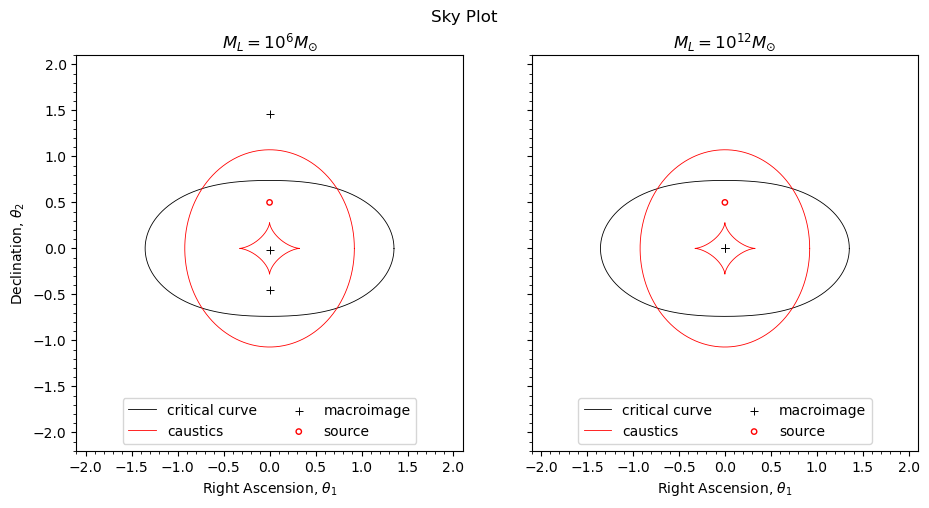

time: 730 ms (started: 2023-02-01 15:11:35 +08:00)


In [10]:
## sky plot

## parametrized curves

epsilon = 0.15
t = np.arange(0, 2*np.pi, 0.001)

# inner caustics
beta_1_in = (2*epsilon/np.sqrt(1-epsilon))*((np.cos(t))**3)
beta_2_in = (2*epsilon/np.sqrt(1+epsilon))*((np.sin(t))**3)

# outer caustics
beta_1_out = ((1-epsilon)/np.sqrt(1-epsilon))*np.cos(t)
beta_2_out = ((1+epsilon)/np.sqrt(1+epsilon))*np.sin(t)

# critical curve
rho = 1 + epsilon*np.cos(2*t)
theta_1 = (1-epsilon)**(-1)*rho*np.cos(t)
theta_2 = (1+epsilon)**(-1)*rho*np.sin(t)


## macroimage positions

#macro_ra_10e6 = np.array([float(x) for x in input_macro.loc[0, 'macro0_ra':'macro3_ra'] 
#                         ])/input_macro['thetaE'][0]
#macro_ra_10e12 = np.array([float(x) for x in input_macro.loc[1, 'macro0_ra':'macro3_ra'] 
#                         ])/input_macro['thetaE'][1]

#macro_dec_10e6 = np.array([float(x) for x in input_macro.loc[0, 'macro0_dec':'macro3_dec'] 
#                         ])/input_macro['thetaE'][0]
#macro_dec_10e12 = np.array([float(x) for x in input_macro.loc[1, 'macro0_dec':'macro3_dec'] 
#                         ])/input_macro['thetaE'][1]

nr = 1
nc = 2

fig, axs = plt.subplots(nrows=nr, ncols=nc, sharey=True, sharex=True, figsize=(10,5))

axs[0].plot(theta_1, theta_2, color='black', linewidth=0.6, label='critical curve')
axs[0].plot(beta_1_in, beta_2_in, color='red', linewidth=0.6, label='caustics')
axs[0].plot(beta_1_out, beta_2_out, color='red', linewidth=0.6)
axs[0].scatter(MacroImg_ra_list[0]/input_macro['thetaE'][0], MacroImg_dec_list[0]/input_macro['thetaE'][0], marker='+', label='macroimage', s=40, 
               linewidth=0.7, color='black')
axs[0].scatter(input_macro['source_ra'][0], input_macro['source_dec'][0],
              color='red', s=15, label='source', facecolor='none')
axs[0].set_title(r'$M_L = 10^{6}M_{\odot}$')
axs[0].legend(ncol=2, loc='lower center')
#axs[0].axhline(0, color='black', linewidth=0.5)
#axs[0].axvline(0, color='black', linewidth=0.5)

axs[1].plot(theta_1, theta_2, color='black', linewidth=0.6, label='critical curve')
axs[1].plot(beta_1_in, beta_2_in, color='red', linewidth=0.6, label='caustics')
axs[1].plot(beta_1_out, beta_2_out, color='red', linewidth=0.6)
axs[1].scatter(MacroImg_ra_list[0]/input_macro['thetaE'][1], MacroImg_dec_list[0]/input_macro['thetaE'][1], marker='+', label='macroimage', s=40, 
               linewidth=0.7, color='black')
axs[1].scatter(input_macro['source_ra'][1], input_macro['source_dec'][1],
              color='red', s=15, label='source', facecolor='none')
axs[1].set_title(r'$M_L = 10^{12}M_{\odot}$')
axs[1].legend(ncol=2, loc='lower center')
#axs[1].axhline(0, color='black', linewidth=0.5)
#axs[1].axvline(0, color='black', linewidth=0.5)

fig.suptitle(r'Sky Plot')

for ax in axs.flat:
    ax.set(xlabel=r'Right Ascension, $\theta_1$', ylabel=r'Declination, $\theta_2$')
    ax.label_outer()
    ax.minorticks_on()
    ax.set_xlim([-2.1,2.1])
    ax.set_ylim([-2.2,2.1])
    ax.set_aspect('equal', adjustable='box')
    #ax.legend(ncol=2, loc='lower left')

plt.tight_layout(pad=1, w_pad=0, h_pad=2)
plt.savefig('/Users/genebelinario/Documents/dnc_research/thesis/figures/macroimages_skyplot', dpi=300)
plt.show()

## Complete Model

In [11]:
# complete model for SIE masses 10**6, 10**12
MacroImg_ra_list  = MacroImg_ra_list
MacroImg_dec_list = MacroImg_dec_list
MacroImg_mag_list = MacroImg_mag_list 
MacroImg_tds_list = MacroImg_tds_list
MacroImg_ns_list  = MacroImg_ns_list

Img_ra_list  = []
Img_dec_list = []
Img_mag_list = []
Img_tds_list = []
Img_ns_list  = []

# complete images vs SIE masses
for n in np.arange(0, len(input_macro.index)):

    # coordinates, first define them in scaled units [x (radians) /thetaE_tot]
    y0, y1 = 0,0.5   

    # redshifts                                                                                                                  
    zS = 2.0 
    zL = 0.5  

    # masses 
    mass_SIE  = np.array([mass for mass in input_macro['lens_mass']])                                                                 
    mass_PML  = 100  
    mtot = mass_SIE[n] + mass_PML

    # convert to radians
    from lensinggw.utils.utils import param_processing

    thetaE_SIE = param_processing(zL, zS, mass_SIE[n])                                                                                                                              
    thetaE_PML = param_processing(zL, zS, mass_PML)                                                                                                                              
    thetaE  = param_processing(zL, zS, mtot)  
    
    # get radian coordinates of most magnified macroimage
    MacroImg_mag_abs = np.array([abs(x) for x in MacroImg_mag_list[n]])
    index_max_mag = np.argmax(MacroImg_mag_abs)

    beta0, beta1 = y0*thetaE, y1*thetaE                                                 
    eta10, eta11 = MacroImg_ra_list[n][index_max_mag], MacroImg_dec_list[n][index_max_mag]                                                                                               
 
    # lens model
    lens_model_list     = ['SIE', 'POINT_MASS'] 
    kwargs_SIE          = {"center_x": 0.0, 'center_y':0.0, 'theta_E':thetaE_SIE, 'e1':-0.081, 'e2':0}
    kwargs_PML          = {'center_x': eta10,'center_y': eta11, 'theta_E': thetaE_PML} 
    kwargs_lens_list    = [kwargs_SIE, kwargs_PML]   

    # indicate the first lens as macromodel and solve with the two-step procedure
    from lensinggw.solver.images import microimages

    solver_kwargs = {'SearchWindowMacro': 4*thetaE_SIE,
                     'SearchWindow'     : 4*thetaE_SIE,
                     'MacroIndex'       : [0],
                     "Optimization"     : True,
                     "PixelsMacro"      : 10**3
                    }   

    Img_ra, Img_dec, MacroImg_ra, MacroImg_dec, pixel_width  = microimages(source_pos_x    = beta0,
                                                                           source_pos_y    = beta1,
                                                                           lens_model_list = lens_model_list,
                                                                           kwargs_lens     = kwargs_lens_list,
                                                                           **solver_kwargs)                                                            
                                                                       
    # time delays, magnifications, Morse indices and amplification factor
    from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
    from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification

    tds = TimeDelay(Img_ra, Img_dec,
                beta0, beta1,
                zL, zS,
                lens_model_list, kwargs_lens_list)                
    mus = magnifications(Img_ra, Img_dec, lens_model_list, kwargs_lens_list)
    ns  = getMinMaxSaddle(Img_ra, Img_dec, lens_model_list, kwargs_lens_list) 
                
    print('Time delays (seconds): ', tds)
    print('magnifications: ',  mus)
    print('Morse indices: ',ns)

    dummy_frequencies = np.linspace(0,10,11)
    F = geometricalOpticsMagnification(dummy_frequencies,
                                   Img_ra,Img_dec,
                                   beta0,beta1,
                                   zL,zS,
                                   lens_model_list,
                                   kwargs_lens_list)

    print('Geometrical optics amplification factor:', F)
    
    Img_ra_list.append(Img_ra)   
    Img_dec_list.append(Img_dec)  
    Img_mag_list.append(mus)  
    Img_tds_list.append(tds)  
    Img_ns_list.append(ns)  


---- Solver settings ----

The macromodel analysis will be performed with the following settings:

OnlyMacro                       --> False
Scaled                          --> False
SearchWindowMacro               --> 3.923525804117745e-08
PixelsMacro                     --> 1000
OverlapDistMacro                --> 1e-15
NearSource                      --> False
Optimization                    --> True
Verbose                         --> False
OptimizationWindowMacro         --> 2
OptimizationPixelsMacro         --> 30
MinDistMacro                    --> None
ImprovementMacro                --> None
OptimizationPrecisionLimitMacro --> 1e-20




MACROIMAGES

ra: [ 7.64953018e-21 -4.96308526e-24 -4.96308526e-24]
dec: [ 1.43608694e-08 -4.39797666e-09 -1.56371210e-10]


---- Solver settings ----

The complete model analysis will be performed with the following settings:

Scaled                          --> False
OnlyMacro                       --> False
MacroIndex                      --

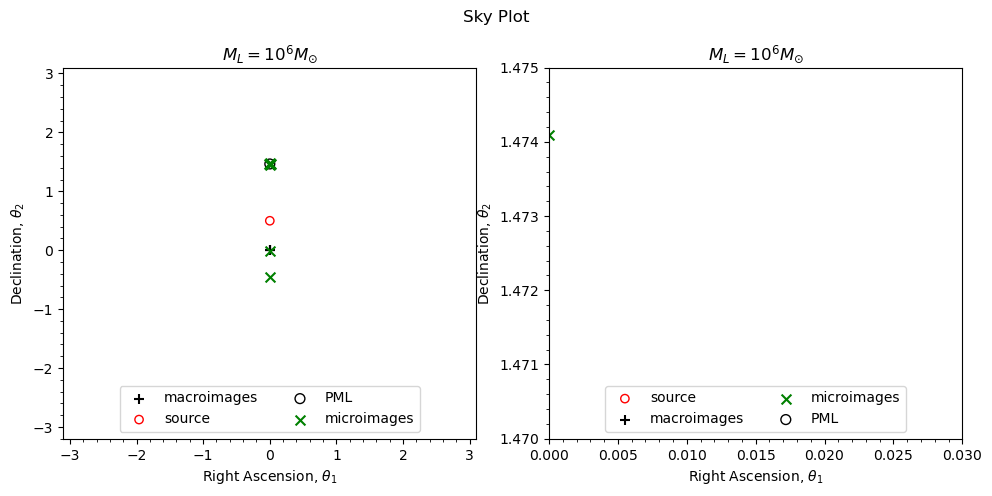

time: 236 ms (started: 2023-02-01 15:11:37 +08:00)


In [12]:
# complete model for SIE 10**6 and 10**12

thetaEs = param_processing(0.5, 2.0, 10**6)
y0, y1 = 0, 0.5
eta10, eta11 = MacroImg_ra_list[0][0], MacroImg_dec_list[0][0] 

fig1, axs = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=False, figsize=(10,5))

axs[0].scatter(np.array(MacroImg_ra_list[0])/thetaEs, np.array(MacroImg_dec_list[0])/thetaE, label='macroimages', color='black', marker='+', s=50)
axs[0].scatter(y0, y1, color='red', label='source', facecolor='none')
axs[0].scatter(eta10/thetaEs, eta11/thetaEs, label='PML', s=50, facecolor='none', color='black')
axs[0].scatter(np.array(Img_ra_list[0])/thetaEs, np.array(Img_dec_list[0])/thetaEs, label='microimages', marker='x', s=50, color='green')
axs[0].set_xlim([-3.1,3.1])
axs[0].set_ylim([-3.2,3.1])
axs[0].set_title(r'$M_L = 10^6 M_{\odot}$')
axs[0].legend(loc='lower center', ncol=2)

axs[1].scatter(y0, y1, color='red', label='source', facecolor='none')
axs[1].scatter(np.array(MacroImg_ra_list[0])/thetaEs, np.array(MacroImg_dec_list[0])/thetaEs, label='macroimages', color='black', marker='+', s=50)
axs[1].scatter(np.array(Img_ra_list[0])/thetaEs, np.array(Img_dec_list[0])/thetaEs, label='microimages', marker='x', s=50, color='green')
axs[1].scatter(eta10/thetaEs, eta11/thetaEs, label='PML', s=50, facecolor='none', color='black')
axs[1].set_xlim([-0., 0.03])
axs[1].set_ylim([1.470, 1.475])
axs[1].set_title(r'$M_L = 10^6 M_{\odot}$')
axs[1].legend(loc='lower center', ncol=2)


fig1.suptitle(r'Sky Plot')

for ax in axs.flat:
    ax.set(xlabel=r'Right Ascension, $\theta_1$', ylabel=r'Declination, $\theta_2$')
    #ax.label_outer()
    ax.minorticks_on()
    #ax.set_aspect('equal', adjustable='box')
    #ax.legend(ncol=2, loc='lower left')

plt.tight_layout(pad=1, w_pad=0, h_pad=2)
#plt.savefig('/Users/genebelinario/Documents/dnc_research/thesis/figures/macroimages_skyplot', dpi=300)
plt.show()


In [13]:
# PML only 



for n in np.arange(0,2):

    # coordinates, first define them in scaled units [x (radians) /thetaE_tot]
    y0,y1 = 0, 0.5

    # redshifts                                                                                                                  
    zS = 2.0 
    zL = 0.5  

    # masses 
    mL1  = 100                                                                   

    # convert to radians
    from lensinggw.utils.utils import param_processing

    thetaE1 = param_processing(zL, zS, mL1) 
    
    MacroImg_mag_abs = np.array([abs(x) for x in MacroImg_mag_list[n]])
    index_max_mag = np.argmax(MacroImg_mag_abs)

    beta0, beta1 = y0*thetaE, y1*thetaE                                                 
    eta10, eta11 = MacroImg_ra_list[n][index_max_mag], MacroImg_dec_list[n][index_max_mag]                                                                                                                                           

    # lens model
    lens_model_list     = ['POINT_MASS'] 
    kwargs_point_mass_1 = {'center_x': eta10,'center_y': eta11, 'theta_E': thetaE1} 
    kwargs_lens_list    = [kwargs_point_mass_1]   

# indicate the first lens as macromodel and solve with the two-step procedure
    from lensinggw.solver.images import microimages

    solver_kwargs = {'SearchWindowMacro': 4*thetaE1,
                     #'SearchWindow'     : 4*thetaE2,
                    'OnlyMacro': True}   

    MacroImg_ra, MacroImg_dec, pixel_width  = microimages(source_pos_x    = beta0,
                                                                       source_pos_y    = beta1,
                                                                       lens_model_list = lens_model_list,
                                                                       kwargs_lens     = kwargs_lens_list,
                                                                       **solver_kwargs)                                                            
                                                                       
    # time delays, magnifications, Morse indices and amplification factor
    from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
    from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification

    tds = TimeDelay(Img_ra, Img_dec,
                beta0, beta1,
                zL, zS,
                lens_model_list, kwargs_lens_list)                
    mus = magnifications(Img_ra, Img_dec, lens_model_list, kwargs_lens_list)
    ns  = getMinMaxSaddle(Img_ra, Img_dec, lens_model_list, kwargs_lens_list) 
                
    print('Time delays (seconds): ', tds)
    print('magnifications: ',  mus)
    print('Morse indices: ',ns)

    dummy_frequencies = np.linspace(0,10,11)
    F = geometricalOpticsMagnification(dummy_frequencies,
                                   Img_ra,Img_dec,
                                   beta0,beta1,
                                   zL,zS,
                                   lens_model_list,
                                   kwargs_lens_list)

    print('Geometrical optics amplification factor:', F)
    
    


---- Will perform only the macromodel analysis ----

---- Solver settings ----

The macromodel analysis will be performed with the following settings:

OnlyMacro         --> True
Scaled            --> False
SearchWindowMacro --> 3.9235258041177455e-10
PixelsMacro       --> 1000
PrecisionLimit    --> 1e-20
OverlapDistMacro  --> 1e-15
NearSource        --> False
Optimization      --> False
Verbose           --> False




MACROIMAGES

ra: [1.42122948e-25]
dec: [4.90440726e-06]

Time delays (seconds):  [  0.         425.01337875 425.01337875 711.9817326 ]
magnifications:  [1. 1. 1. 1.]
Morse indices:  [0, 0, 0, 0]
Geometrical optics amplification factor: [4.        +0.j         3.98635817+0.05339882j 3.94556916+0.10711883j
 3.87804083+0.16146976j 3.78444805+0.21673862j 3.66572526+0.27317885j
 3.52305631+0.33100009j 3.35786154+0.39035862j 3.17178234+0.45134892j
 2.96666325+0.51399616j 2.74453202+0.57825008j]

---- Will perform only the macromodel analysis ----

---- Solver settings ----

T

## Unlensed Gravitational Waves

In [14]:
# chirp mass = 60, q = 1
# m1 = 68.921901
# m2 = 68.921901
# nonspinning

# This script illustrates how to use lensingGW's unlensed waveform routines

from lensinggw.waveform.waveform import gw_signal

# read the waveform parameters
config_file = '/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/ini_files/waveform_config.ini'

# instantiate the waveform model
waveform_model = gw_signal(config_file)

# compute the unlensed waveform polarizations, strains in the requested detectors and their frequencies
freqs, hp_tilde, hc_tilde, strain_dict = waveform_model.unlensed_gw()

# and their signal-to-noise-ratios
SNR_dict = waveform_model.unlensed_snr()

# access an unlensed strain
sH1 = strain_dict['H1']



---- Will simulate a signal with the following parameters ----

m1          --> 45
m2          --> 36
spin1x      --> 0.0
spin1y      --> 0.0
spin1z      --> 0.0
spin2x      --> 0.0
spin2y      --> 0.0
spin2z      --> 0.0
distance    --> 15521.788104196934
ra          --> 0
dec         --> 4.904407255147181e-09
psi         --> 0.0
inclination --> 2.6
phi0        --> 0.0
lambda1     --> 0.0
lambda2     --> 0.0


---- Will use the following setup ----

flow          --> 20.0
fhigh         --> 1024
fref          --> 20.0
df            --> 0.125
sampling-rate --> 2048
approximant   --> IMRPhenomPv2
amp_order     --> 0
phase_order   --> -1
starttime     --> -7.0
trigtime      --> 0.0


---- Will simulate the signal in the following detectors ----

H1     --> True
H1-psd --> /Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/psds/LIGO-P1200087-v18-aLIGO_DESIGN_psd.dat


Unlensed SNR in H1 = 1.80
Network SNR of the unlensed simulation 1.804045

time: 63

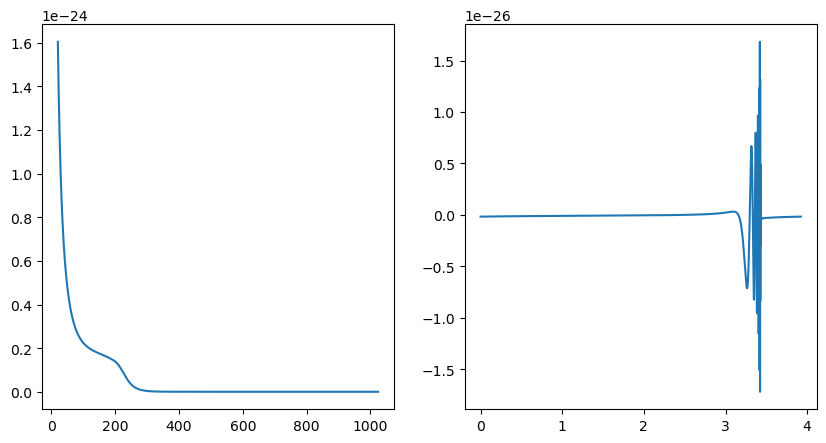

time: 85.9 ms (started: 2023-02-01 15:11:38 +08:00)


In [15]:


figGW, axsGW = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plot frequency domain
axsGW[0].plot(freqs, np.abs(sH1))

# plot time domain
# https://stackoverflow.com/questions/68757419/how-to-convert-x-axis-from-samples-into-time-s-and-frequency-hz-with-python
sampling_rate = 2048 
max_time = len(freqs)/sampling_rate
time = np.linspace(0, max_time, len(freqs))
axsGW[1].plot(time, np.real(np.fft.ifft(sH1)))

## Lensed Gravitational Waves

In [16]:
# PML with SIE
lensed_sH1_list = []

for n in np.arange(0,2):
    
    y0, y1 = 0, 0.5
    
    mass_SIE = [10**6, 10**12]
    mass_PML = 100
    
    thetaE_SIE = param_processing(0.5, 2.0, mass_SIE[n])                                                                                                                              
    thetaE_PML = param_processing(zL, zS, mass_PML) 
    thetaE = param_processing(zL, zS, mass_PML + mass_SIE[n]) 
    
    # source position, in radians
    MacroImg_mag_abs = np.array([abs(x) for x in MacroImg_mag_list[n]])
    index_max_mag = np.argmax(MacroImg_mag_abs)

    beta0, beta1 = y0*thetaE, y1*thetaE                                                 
    eta10, eta11 = MacroImg_ra_list[n][index_max_mag], MacroImg_dec_list[n][index_max_mag]  

    # redshifts
    zL, zS = 0.5, 2.0

    # binary point mass lens model
    lens_model_list     = ['SIE', 'POINT_MASS'] 
    kwargs_SIE          = {"center_x": 0.0, 'center_y':0.0, 'theta_E':thetaE_SIE, 'e1':-0.081, 'e2':0}
    kwargs_PML          = {'center_x': eta10,'center_y': eta11, 'theta_E': thetaE_PML} 
    kwargs_lens_list    = [kwargs_SIE, kwargs_PML]

    # microimages in radians
    ra  = Img_ra_list[n]
    dec = Img_dec_list[n]

    ####################
    # lensed waveforms #
    ####################

    from lensinggw.waveform.waveform import gw_signal

    # read the waveform parameters
    config_file = '/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/ini_files/waveform_config.ini'

    # instantiate the waveform model
    waveform_model = gw_signal(config_file)

    # compute the lensed waveform polarizations, strains in the requested detectors and their frequencies
    freqs_lensed, hp_tilde_lensed, hc_tilde_lensed, lensed_strain_dict = waveform_model.lensed_gw(ra,dec,
                                                                                              beta0,beta1,
                                                                                              zL, zS,
                                                                                              lens_model_list,
                                                                                              kwargs_lens_list)

    # and their signal-to-noise-ratios
    lensed_SNR_dict = waveform_model.lensed_snr(ra,dec,
                                            beta0,beta1,
                                            zL, zS,
                                            lens_model_list,
                                            kwargs_lens_list)

    # access a lensed strain
    lensed_sH1 = lensed_strain_dict['H1']
    
    lensed_sH1_list.append(lensed_sH1)


---- Will simulate a signal with the following parameters ----

m1          --> 45
m2          --> 36
spin1x      --> 0.0
spin1y      --> 0.0
spin1z      --> 0.0
spin2x      --> 0.0
spin2y      --> 0.0
spin2z      --> 0.0
distance    --> 15521.788104196934
ra          --> 0
dec         --> 4.904407255147181e-09
psi         --> 0.0
inclination --> 2.6
phi0        --> 0.0
lambda1     --> 0.0
lambda2     --> 0.0


---- Will use the following setup ----

flow          --> 20.0
fhigh         --> 1024
fref          --> 20.0
df            --> 0.125
sampling-rate --> 2048
approximant   --> IMRPhenomPv2
amp_order     --> 0
phase_order   --> -1
starttime     --> -7.0
trigtime      --> 0.0


---- Will simulate the signal in the following detectors ----

H1     --> True
H1-psd --> /Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/psds/LIGO-P1200087-v18-aLIGO_DESIGN_psd.dat


Lensed SNR in H1 = 8.25
Network SNR of the lensed simulation 8.250361


---- Will s

Text(0, 0.5, 'Strain, $|S(t)|$')

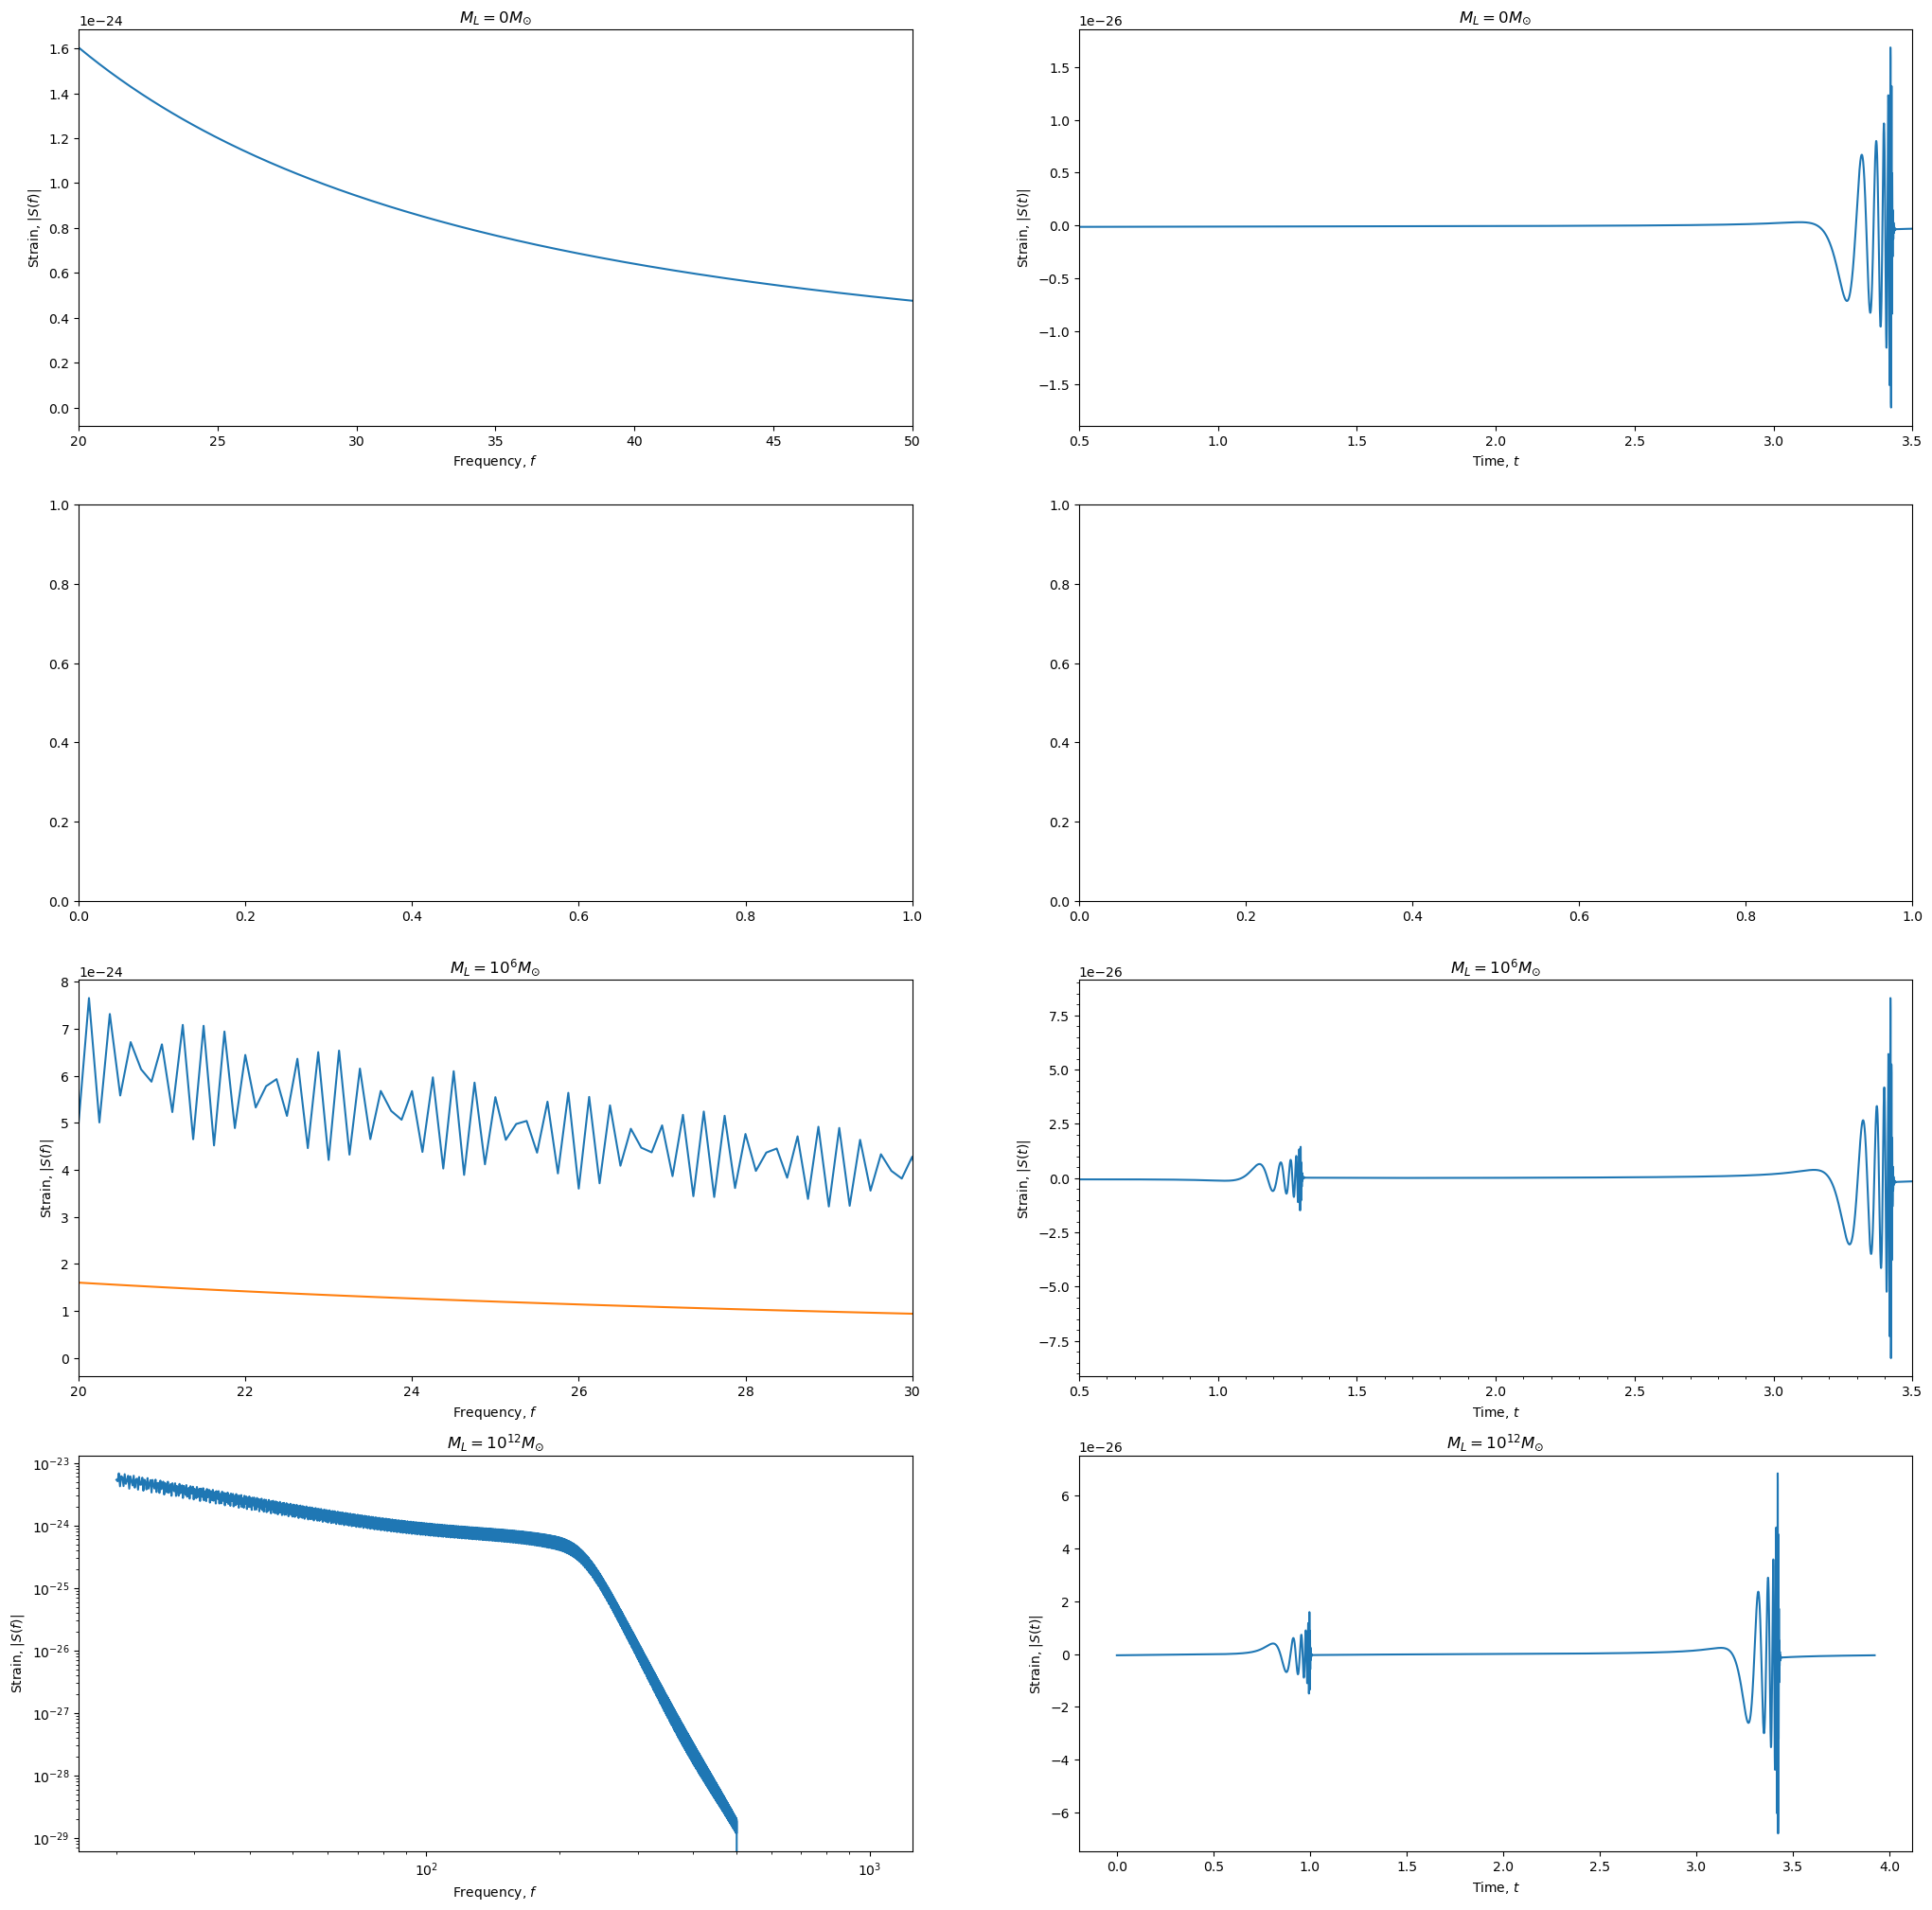

time: 660 ms (started: 2023-02-01 15:11:39 +08:00)


In [17]:
figLGW, axsLGW = plt.subplots(nrows=4, ncols=2, figsize=(25,25), sharey=False, sharex=False)

# plot frequency domain, unlensed GW
axsLGW[0,0].plot(freqs, np.abs(sH1))
axsLGW[0,0].set_xlim([20, 50])
axsLGW[0,0].set_title(r'$M_L = 0 M_{\odot}$')
axsLGW[0,0].set_xlabel(r'Frequency, $f$')
axsLGW[0,0].set_ylabel(r'Strain, $|S(f)|$')

# plot time domain, unlensed GW
# https://stackoverflow.com/questions/68757419/how-to-convert-x-axis-from-samples-into-time-s-and-frequency-hz-with-python
sampling_rate = 2048 
max_time = len(freqs)/sampling_rate
time = np.linspace(0, max_time, len(freqs))
axsLGW[0,1].plot(time, np.real(np.fft.ifft(sH1)))
axsLGW[0,1].set_title(r'$M_L = 0 M_{\odot}$')
axsLGW[0,1].set_xlabel(r'Time, $t$')
axsLGW[0,1].set_ylabel(r'Strain, $|S(t)|$')
axsLGW[0,1].set_xlim([0.5, 3.5])

# plot frequency domain, SIE mass = 10**6
axsLGW[2,0].plot(freqs_lensed, np.abs(lensed_sH1_list[0]))
axsLGW[2,0].set_xlim([20, 30])

axsLGW[2,0].set_title(r'$M_L = 10^{6} M_{\odot}$')
axsLGW[2,0].set_xlabel(r'Frequency, $f$')
axsLGW[2,0].set_ylabel(r'Strain, $|S(f)|$')
axsLGW[2,0].plot(freqs, np.abs(sH1))

# plot time domain, SIE mass = 10**6
# https://stackoverflow.com/questions/68757419/how-to-convert-x-axis-from-samples-into-time-s-and-frequency-hz-with-python
sampling_rate = 2048 
max_time = len(freqs_lensed)/sampling_rate
time = np.linspace(0, max_time, len(freqs))
axsLGW[2,1].plot(time, np.real(np.fft.ifft(lensed_sH1_list[0])))
axsLGW[2,1].set_title(r'$M_L = 10^{6} M_{\odot}$')
axsLGW[2,1].set_xlabel(r'Time, $t$')
axsLGW[2,1].set_ylabel(r'Strain, $|S(t)|$')
axsLGW[2,1].set_xlim([0.5, 3.5])
axsLGW[2,1].minorticks_on()

# plot frequency domain, SIE mass = 10**12
axsLGW[3,0].plot(freqs_lensed, np.abs(lensed_sH1_list[1]))
#axsLGW[3,0].set_xlim([20, 40])
axsLGW[3,0].set_title(r'$M_L = 10^{12} M_{\odot}$')
axsLGW[3,0].set_xlabel(r'Frequency, $f$')
axsLGW[3,0].set_ylabel(r'Strain, $|S(f)|$')
axsLGW[3,0].set_xscale('log')
axsLGW[3,0].set_yscale('log')
#axsLGW[3,0].plot(freqs, np.abs(sH1))

# plot time domain, SIE mass = 10**12
# https://stackoverflow.com/questions/68757419/how-to-convert-x-axis-from-samples-into-time-s-and-frequency-hz-with-python
sampling_rate = 2048 
max_time = len(freqs_lensed)/sampling_rate
time = np.linspace(0, max_time, len(freqs))
axsLGW[3,1].plot(time, np.real(np.fft.ifft(lensed_sH1_list[1])))
axsLGW[3,1].set_title(r'$M_L = 10^{12} M_{\odot}$')
axsLGW[3,1].set_xlabel(r'Time, $t$')
axsLGW[3,1].set_ylabel(r'Strain, $|S(t)|$')
#axsLGW[3,1].set_xlim([0.5, 3.5])

